>>  UNIVERSIDADE FEDERAL DE ALAGOAS  
>>  INSTITUTO DE COMPUTAÇÃO  
>>  CIÊNCIA DA COMPUTAÇÃO  
>>  SISTEMAS DISTRIBUÍDOS  
>>  PROF. ANDRÉ LAGE FREITAS  

>Aluna: Tamirys Coelho de Oliveira Pino  
>Matrícula: 11111457

**Especificação: ** A atividade complementar da AB2 (10% da AB2) será a implementação e explicação do algoritmo de *comunicação em grupo* ou de *eleição de líder* que vocês escolheram e estudaram. Implementem em qualquer linguagem de programação e documente detalhadamente (em comentários) como o algoritmo funciona. Explique os passos para compilação e execução do programa no Ubuntu 15.10, incluindo instalação de pacotes (apenas com apt-get e repositórios oficiais). Entrega exclusivamente por email até o  dia 08/05/16 (prazo não extensível).

<h3 style="text-align: center;" markdown="1"> Atividade Complementar da AB2</h3>

O algoritmo escolhido foi o **algoritmo de eleição de líder em anel**. Cada processo P_i_ está conectado ao próximo processo P_i+1_. Um processo solicita a eleição por vez. O processo que tiver o maior ID é o eleito. Inicialmente, o líder é o processo que solicitou a eleição de líder. Ao ser encontrado um ID maior, este passa a ser o novo líder. Até que se o processo recebe uma mensagem com o identificador idêntico ao seu, então a eleição termina e ele é o líder oficial. Este evento só ocorre quando a mensagem contendo o maior identificador circulou por todo o anel, tornando todos os seus membros cientes do resultado.  
Na atividade abaixo, cada nó do grafo é um processo P_i_, eles são aleatoriamente organizados. Um nó aleatório solicita a eleição de líder. Abaixo encontra-se o código comentado com os recursos utilizados.

In [1]:
#Adiciona o pacote que torna possível a utilização de grafos
#Os grafos foram utilizados para melhor representação visual do anel
Pkg.add("Graphs")
using Graphs

#Essa função recebe um grafo não preenchido e uma sequencia de ids de processos e cria um grafo cíclico
#Seguindo a ordem dos ids passados
function criaAnel(P, ids)
    i = 1
    j = i+1
    qntProc = length(ids)
    while i<qntProc
        #Adiciona arestas entre os processos i e j, de acordo com a ordem passada pelo parametro ids
        add_edge!(P, ids[i], ids[j])
        i = i+1
        j = j+1
    end
    add_edge!(P, ids[qntProc], ids[1])
end

#Quantidade de elementos de um anel de processos
n = 8
#Desordena um array de n elementos
eleicao = sortperm(randn(n))

#Cria um grafo P não preenchido
P = simple_graph(n)

#Cria um grafo cíclico (anel) com a ordenação definida pelo parâmetro eleicao
criaAnel(P, eleicao)

#Exige a ordenação do array de processos (nós do grafo)
println(eleicao)

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Graphs
INFO: Use `Pkg.update()` to get the latest versions of your packages


[8

###A imagem do grafo abaixo deixa mais clara a visualização do anel.

INFO: Nothing to be done


,1,5,4,3,2,6,7]


INFO: METADATA is out-of-date — you may not have the latest version of TikzGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages


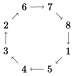

In [2]:
#Pacotes utilizados para habilitar a produção da imagem que representa o grafo cíclico (anel)
Pkg.add("TikzGraphs")
using TikzGraphs
#http://nbviewer.jupyter.org/github/sisl/TikzGraphs.jl/blob/master/doc/TikzGraphs.ipynb
#Este pacote foi utilizado devido ao erro "Failed to open XLIB display:" com o pacote GraphViz


#Plota o grafo P em formato cíclico
TikzGraphs.plot(P, Layouts.Spring())

In [3]:
#Processo aleatório solicita a eleição
x = rand(1:n)
println("$x solicitou uma eleição!")
println("Novo líder parcial: $x")

#Array de processos é reordenado para começar a eleição pelo processo que a solicitou
#Encontra-se o index do processo no array de processos (está operação retorna um array de um elemento)
#Foi colocada a operação de soma para que fosse retornado um valor inteiro e não um array
a = sum(find(eleicao -> eleicao == x, eleicao))
#É feita a sublista a partir do processo para o final do array
b = sub(eleicao, a:length(eleicao))
#Outro sublista é feita do início do array até o processo
c = sub(eleicao, 1:(a-1))
#As sublistas são concatenadas, de forma que o processo que solicitou a eleição, comece-a, sem modificar a estrutura do anel.
eleicao = vcat(b, c)

#Lider inicial é aquele que solicitou a eleição
leader_id = x
#Líder final é desconhecido (será o que tiver maior ID)
leader_final = 0
#Quantidade total de participantes no processo
process = length(eleicao)
#Quantidade de processos que conhecem o novo líder
p_knows_leader = 0

while(process != p_knows_leader)
    #Para cada membro do anel eleicao
    for u in eleicao
        #O id do líder atual é passado para o próximo membro do anel, seguindo o sentido horário
        for o in out_neighbors(vertices(P)[u], P)
            #Se o próximo membro possuir um id maior que o do líder atual, então ele toma o posto de líder
            println("$o > $leader_id ?")
            #Se o líder atual for o próprio, então encerra a eleição
            
            if (o > leader_id)
                println("Novo líder parcial: $o")
                p_knows_leader = 0
                leader_id = o
            end
        end
        p_knows_leader = p_knows_leader + 1
        if(process == p_knows_leader)
            break;
        end
        
    end
    leader_final = leader_id
end
println("Líder final: $leader_final")

8 solicitou uma eleição!
Novo líder parcial: 8
1 > 8 ?
5 > 8 ?
4 > 8 ?
3 > 8 ?
2 > 8 ?
6 > 8 ?
7 > 8 ?
8 > 8 ?
Líder final: 8


> Atividade realizada em 06/05/2015 e 07/05/2016, para a disciplina de Sistemas Distribuídos, semestre letivo 2015.2. Foi feita utilizando o IJulia Notebook, kernel versão 0.3.12 (para evitar avisos de objetos obsoletos durante a execução da imagem do grafo, porém as outras versões podem ser utilizadas).

------------------------------------------------------------------------------------------------------------------